# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [2]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10
0.000001 --  -2e-12
0.000000 --  -2e-14
0.000000 --  -2e-16


Отклонение пропорционально квадрату шага как и должно быть

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [3]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def deriv_2p(f, x, h):
    return (f(x+h)-f(x))/(h)

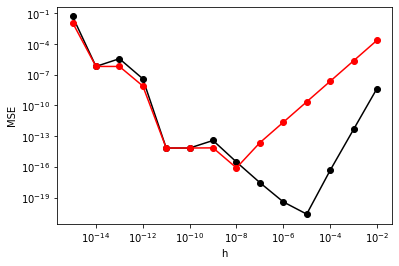

In [4]:
import numpy as np
import matplotlib.pyplot as plt
h = (pow(0.1, np.arange(2, 16)))
err1 = np.zeros(len(h))
err2 = np.zeros(len(h))
for i in range(len(h)):
    err1[i] = (deriv(f, 1, h[i]) - fder(1))**2
    err2[i] = (deriv_2p(f, 1, h[i]) - fder(1))**2
plt.plot(h, err1, '-o', color='black')
plt.plot(h, err2, '-o', color='r')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("MSE")
plt.show()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [5]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)
    
x = 0
for i in range(len(h)):
    err = deriv(f, x, h[i]) - fder(x)
    print("%5f -- %7.4g" % (h[i], err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05
0.000001 -- -1.386e-06
0.000000 -- -1.386e-07
0.000000 -- -1.386e-08
0.000000 -- -1.386e-09
0.000000 -- -1.386e-10
0.000000 -- -1.386e-11
0.000000 -- -1.386e-12
0.000000 -- -1.386e-13
0.000000 -- -1.386e-14
0.000000 -- -1.386e-15


Теперь ошибка пропорциональна $h$, вместо $h^2$. Это можно объснить вспомнив, что первый остаточный член для нашей формулы определяется ~$h^2f'''$, где $f'''$ ~ $\frac{1}{x}$, в то время как $f$ и $f''$ зануляются. Тогда понятно, почему $x^3$ так четко отработала, ее третья производная просто константа $=>$ сходимость $h^2$

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [146]:
def midpoint_rule(func, a, b, eps, double=False):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    I = (b-a)*func((a+b)/2)
    for N in range(5, 100000):
        if double == True:
            dots = np.linspace(a, b, 2*N)
        else:
            dots = np.linspace(a, b, N)
        points = (dots[1:]+dots[:-1])/2
        h = dots[1]-dots[0]
        I_new = h*np.sum(func(points))
        if abs(I_new-I)<eps:
            return I_new, N
        I = I_new

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


$$
\int_0^3\! x^2\, dx = 9
$$

eps: 1e-06
Значение интеграла: 8.999918348091159 кол-во разбиений: 167 

eps: 1.090909090909091e-06
Значение интеграла: 8.999913197793294 кол-во разбиений: 162 

eps: 1.1818181818181818e-06
Значение интеграла: 8.999908718406424 кол-во разбиений: 158 

eps: 1.2727272727272726e-06
Значение интеграла: 8.999903883121876 кол-во разбиений: 154 

eps: 1.3636363636363636e-06
Значение интеграла: 8.9999 кол-во разбиений: 151 

eps: 1.4545454545454546e-06
Значение интеграла: 8.999895876718032 кол-во разбиений: 148 

eps: 1.5454545454545454e-06
Значение интеграла: 8.999891493055554 кол-во разбиений: 145 

eps: 1.6363636363636363e-06
Значение интеграла: 8.999886826618381 кол-во разбиений: 142 

eps: 1.7272727272727273e-06
Значение интеграла: 8.99988354640029 кол-во разбиений: 140 

eps: 1.8181818181818183e-06
Значение интеграла: 8.999878352076127 кол-во разбиений: 137 

eps: 1.909090909090909e-06
Значение интеграла: 8.9998746936957 кол-во разбиений: 135 

eps: 2.0000000000000003e-06
Значение интегр

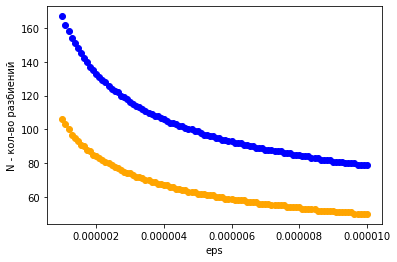

In [191]:
# Точный интеграл равен 9. Для наглядности будем работать с самим значением, а не с разностью.
epsilon = np.linspace(1e-6, 1e-5, 100)
for eps in epsilon:
    I, N = midpoint_rule(lambda x: x**2, 0, 3, eps)
    print("eps:", eps)
    print("Значение интеграла:", I, "кол-во разбиений:", N, "\n")
    plt.plot(eps, N, 'o', color='b')
    I1, N1 = midpoint_rule(lambda x: x**2, 0, 3, eps, double=True)
    plt.plot(eps, N1, 'o', color='orange')
plt.xlabel("eps")
plt.ylabel("N - кол-во разбиений")
plt.show()    



Похоже на правду ($\frac{1}{N^2}$)

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx = \frac{1}{\sqrt{x}}+\frac{x^{\frac{3}{2}}}{6}+\;...\;\;\;\Rightarrow 
$$

$$
\Rightarrow \;\;\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
= \int_0^1\! \frac{\sin{\sqrt{x}}}{x}-\frac{1}{\sqrt{x}}\, dx 
\;+\int_0^1\! \frac{1}{\sqrt{x}}\, dx 
$$
$$\int_0^1\! \frac{1}{\sqrt{x}}\, dx = 2$$

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


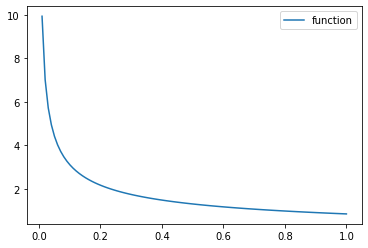

In [189]:
def f1(x):
    return np.sin(np.sqrt(x))/x

def f2(x):
    return f1(x)-np.sqrt(1/x)

def f3(x):
    return np.sqrt(1/x)

xx=np.linspace(0, 1, 100)
plt.plot(xx, f1(xx), label="function")
plt.legend()
# plt.plot(xx, f2(xx))

In [177]:
print(midpoint_rule(f1, 0, 1, 1e-4), "попытка посчитать влоб")
print(midpoint_rule(f2, 0, 1, 1e-4), "Интеграл без сингулярности")
print(midpoint_rule(f3, 0, 1, 1e-7), "Проверка")
print(midpoint_rule(f2, 0, 1, 1e-4)[0]+2, "Итоговое значение")

(1.85042137398677, 211) попытка посчитать влоб
(-0.10823517310390517, 9) Интеграл без сингулярности
(1.9958173293285268, 20916) Проверка
1.891764826896095 Итоговое значение


Вывод:
вполне себе качественный способ посчитать интеграл, но при сингулярностях считаем руками.